<a href="https://colab.research.google.com/github/tnv-pramod/Data-analysis-project2-/blob/me/Netflix_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#package importing

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [83]:
x=pd.read_csv("/content/Netflix_data.csv")

#Data cleaning

In [84]:
value_mapping = {'PG-13': 'Adults only', 'TV-MA': 'Adults only', 'PG': 'parental guidance','TV-14':'Adults only','TV-PG':'parental guidance','TV-Y':'children watchable','TV-Y7':'age 7to above','R':'restricted','TV-G':'general audience','G':'general audience','NC-17':'Adults only','74 min':'60-90 min range','84 min':'60-90 min range','66 min':'60-90 min range','NR':'not rated','TV-Y7-FV':'age 7to above','UR':'not rated'}
x['rating'] = x['rating'].replace(value_mapping)

In [85]:
x.rename(columns={'listed_in': 'genere'}, inplace=True)

In [86]:
value_to_delete = '60-90 min range'
x.loc[x['rating'] == value_to_delete, 'rating'] = None

In [87]:
x = x.drop('date_added', axis=1)

In [88]:
def convert_duration(duration):
    if pd.isna(duration) or not isinstance(duration, str):
        return duration
    elif 'min' in duration:
        minutes = int(duration.split(' ')[0])
        hours, remainder_minutes = divmod(minutes, 60)
        return f'{hours:02d}:{remainder_minutes:02d}:00'
    else:
        return duration
x['duration'] = x['duration'].apply(convert_duration)

In [89]:
value_counts = x['country'].value_counts()
values_to_keep = value_counts[value_counts > 100].index
mask = x['country'].isin(values_to_keep)
df= x[mask]
x.reset_index(drop=True, inplace=True)
values_to_keep

Index(['United States', 'India', 'United Kingdom', 'Japan', 'South Korea',
       'Canada', 'Spain', 'France', 'Mexico', 'Egypt', 'Turkey', 'Nigeria',
       'Australia', 'Taiwan', 'Indonesia', 'Brazil', 'Philippines',
       'United Kingdom, United States', 'United States, Canada', 'Germany',
       'China', 'Thailand', 'Argentina', 'Hong Kong'],
      dtype='object')

In [90]:
mask = x['release_year'] > 2000
x =x[mask]
x = x.reset_index(drop=True)

#pie chart
#Netflix Type(movies and tv shows) are likely to

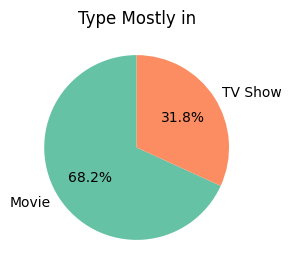

In [91]:
value_counts = x['type'].value_counts()
plt.figure(figsize=(3,3))
sns.set_palette('Set2')
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Type Mostly in')
plt.show()

#bar chart
#The movie and the TV shows are more in the rating of..

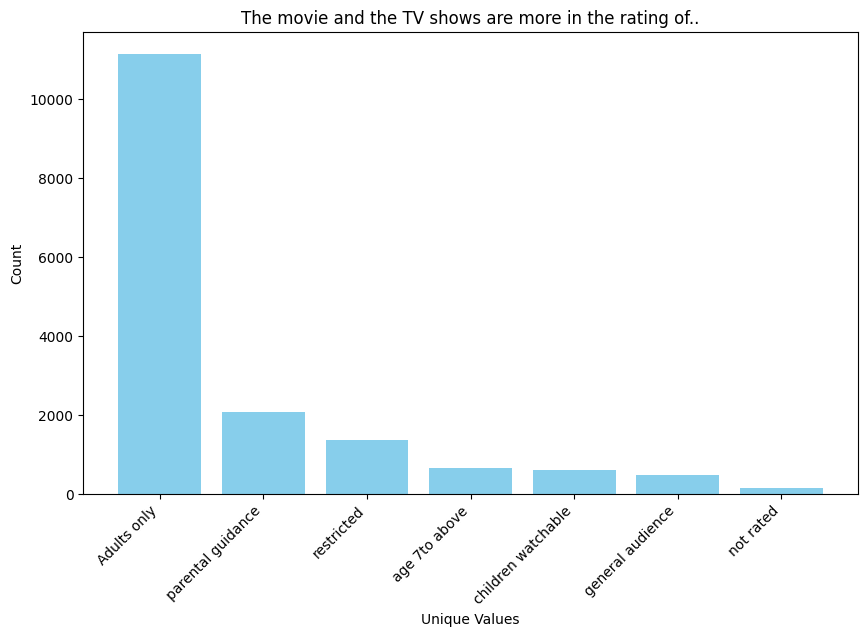

In [92]:
value_counts = x['rating'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(value_counts.index, value_counts, color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Unique Values')
plt.ylabel('Count')
plt.title('The movie and the TV shows are more in the rating of..')
plt.show()

#Histogram chart
#Distrubtion of movies released over years

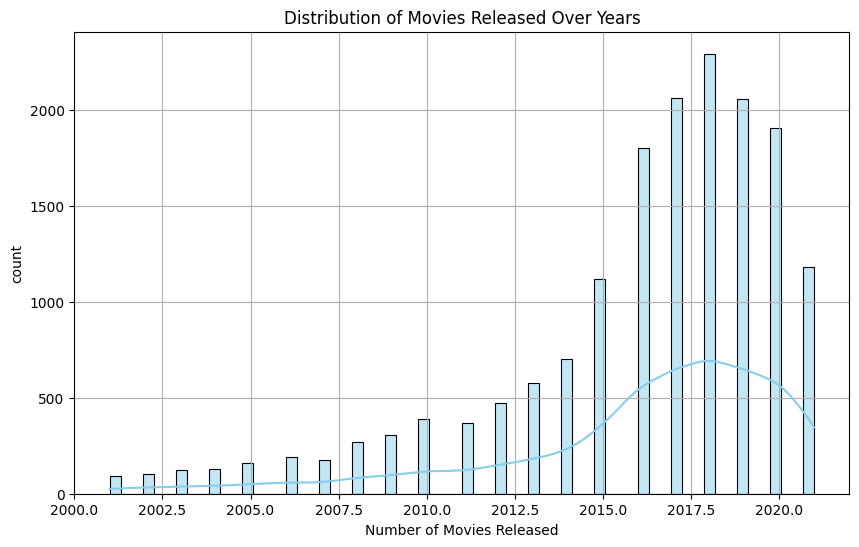

In [93]:
plt.figure(figsize=(10, 6))
sns.histplot(x['release_year'], bins='auto', kde=True, color='skyblue', edgecolor='black')
plt.xlabel('Number of Movies Released')
plt.ylabel('count')
plt.title('Distribution of Movies Released Over Years')
plt.grid(True)
plt.show()

#Grouped Bar Chart
#Types are more going through for a different rating

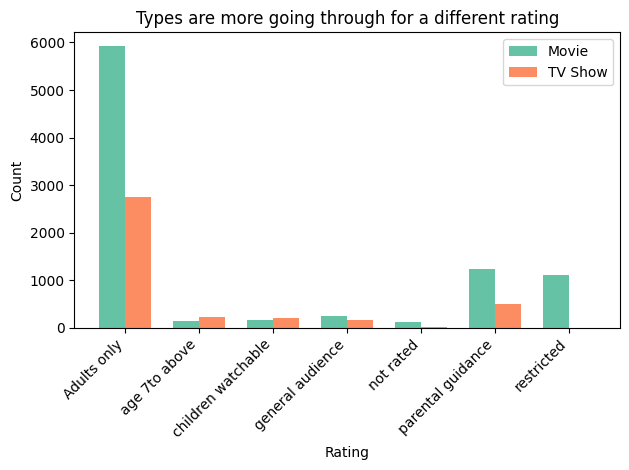

In [94]:
grouped_data = df.groupby(['rating', 'type']).size().unstack(fill_value=0)
ratings_types = grouped_data.index
types = grouped_data.columns
counts = grouped_data.values.T
fig, ax = plt.subplots()
bar_width = 0.35
bar_positions = np.arange(len(ratings_types))
for i, type_count in enumerate(counts):
    ax.bar(bar_positions + i * bar_width, type_count, bar_width, label=types[i])
ax.set_xlabel('Rating')
ax.set_ylabel('Count')
ax.set_title('Types are more going through for a different rating')
ax.set_xticks(bar_positions + (len(types) - 1) * bar_width / 2)
ax.set_xticklabels(ratings_types, rotation=45, ha="right")
ax.legend()
plt.tight_layout()
plt.show()

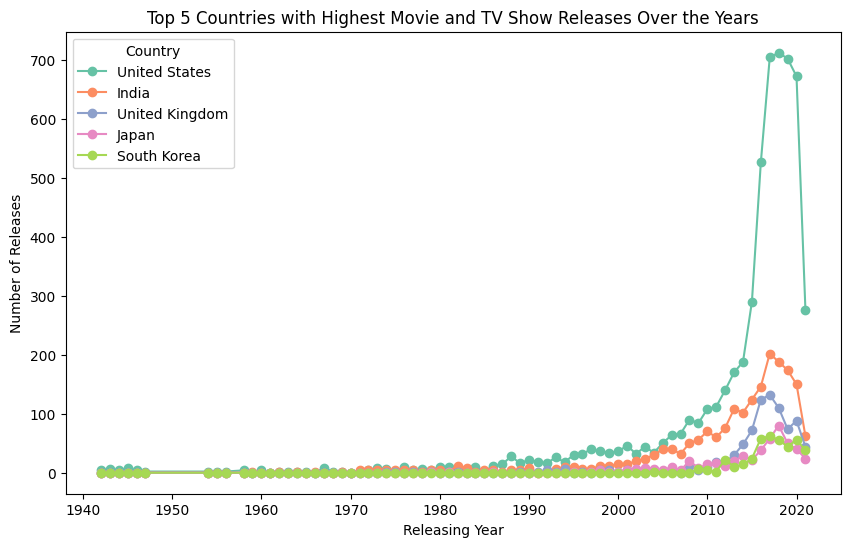

In [95]:
grouped_data = df.groupby(['country', 'release_year']).size().unstack(fill_value=0)

# Sum the releases over the years for each country
total_releases = grouped_data.sum(axis=1)

# Select the top 5 countries
top_countries = total_releases.nlargest(5).index

# Filter the grouped data for only the top 5 countries
grouped_data_top5 = grouped_data.loc[top_countries]

# Sort the data by release years in ascending order
grouped_data_top5 = grouped_data_top5.sort_index(axis=1)

# Plot the line chart
ax = grouped_data_top5.T.plot(kind='line', marker='o', figsize=(10, 6))

# Add labels, title, legend, etc.
ax.set_xlabel('Releasing Year')
ax.set_ylabel('Number of Releases')
ax.set_title('Top 5 Countries with Highest Movie and TV Show Releases Over the Years')
ax.legend(title='Country')

# Show the plot
plt.show()

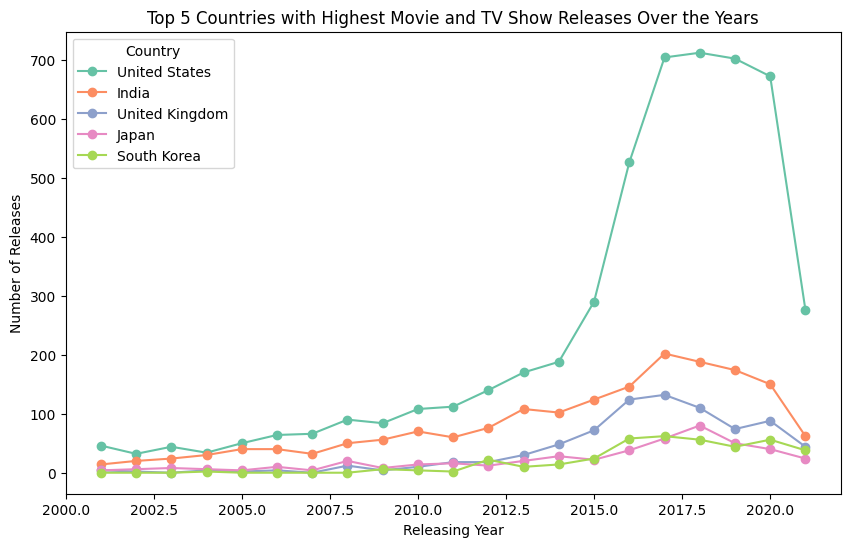

In [96]:
import matplotlib.pyplot as plt
import pandas as pd
import mplcursors

# Assuming you have a DataFrame named 'df' with columns 'Country' and 'Releasing_Year'
# Example:
# df = pd.DataFrame({'Country': ['USA', 'USA', 'UK', 'UK', 'India'],
#                    'Releasing_Year': [2020, 2021, 2020, 2021, 2021]})

# Group the data by 'Country' and 'Releasing_Year' and calculate counts
grouped_data = x.groupby(['country', 'release_year']).size().unstack(fill_value=0)

# Sum the releases over the years for each country
total_releases = grouped_data.sum(axis=1)

# Select the top 5 countries
top_countries = total_releases.nlargest(5).index

# Filter the grouped data for only the top 5 countries
grouped_data_top5 = grouped_data.loc[top_countries]

# Sort the data by release years in ascending order
grouped_data_top5 = grouped_data_top5.sort_index(axis=1)

# Plot the line chart
fig, ax = plt.subplots(figsize=(10, 6))

for country in grouped_data_top5.index:
    ax.plot(grouped_data_top5.columns, grouped_data_top5.loc[country], marker='o', label=country)

# Add labels, title, legend, etc.
ax.set_xlabel('Releasing Year')
ax.set_ylabel('Number of Releases')
ax.set_title('Top 5 Countries with Highest Movie and TV Show Releases Over the Years')
ax.legend(title='Country')

# Enable cursor for accurate point information
mplcursors.cursor(hover=True)

# Show the plot
plt.show()

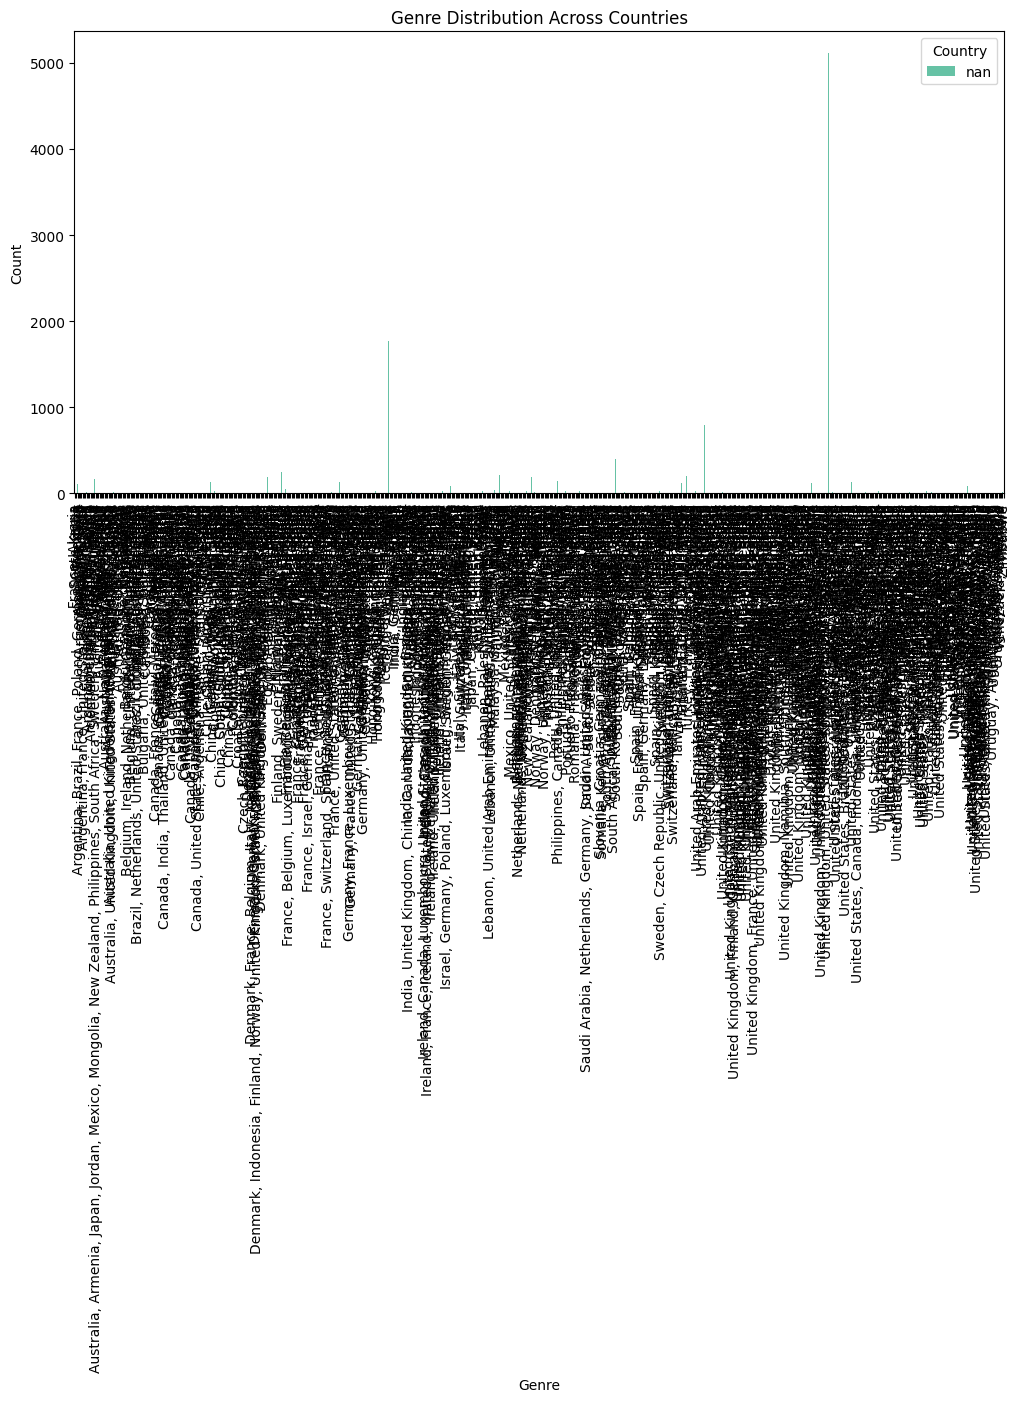

In [105]:
df = x.dropna(subset=['genere'])
x['genere'] = x['genere'].astype(str)

# Split the 'Genre' column into separate genres
x['genere'] = x['genere'].str.split(', ')

# Create a new DataFrame with one row per genre
df_genres = x.explode('genere')

# Count the occurrences of each genre for each country
genre_counts = df_genres.groupby(['country', 'genere']).size().unstack(fill_value=0)

# Plot the bar chart
ax = genre_counts.plot(kind='bar', stacked=True, figsize=(12, 6))

# Add labels, title, legend, etc.
ax.set_xlabel('Genre')
ax.set_ylabel('Count')
ax.set_title('Genre Distribution Across Countries')
ax.legend(title='Country')

# Show the plot
plt.show()

In [98]:
x

,type,title,country,release_year,rating,duration,genere
0,Movie,Dick Johnson Is Dead,United States,2020,Adults only,01:30:00,Documentaries
1,TV Show,Blood & Water,South Africa,2021,Adults only,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,TV Show,Ganglands,NaN,2021,Adults only,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,TV Show,Jailbirds New Orleans,NaN,2021,Adults only,1 Season,"Docuseries, Reality TV"
4,TV Show,Kota Factory,India,2021,Adults only,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."
...,...,...,...,...,...,...,...
16485,Movie,Zodiac,United States,2007,restricted,02:38:00,"Cult Movies, Dramas, Thrillers"
16486,TV Show,Zombie Dumb,NaN,2018,age 7to above,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies"
16487,Movie,Zombieland,United States,2009,restricted,01:28:00,"Comedies, Horror Movies"
16488,Movie,Zoom,United States,2006,parental guidance,01:28:00,"Children & Family Movies, Comedies"
